#Lista 9

Nome: Lucas Martins Oliveira

##Questao 1

Considere o seguinte problema advectivo
    \begin{equation*}
        \frac{\partial u}{\partial t} + 0.5\frac{\partial u}{\partial x} = 0 \text{ em }\Omega \times I
    \end{equation*}

Tomando $\Omega = [0,20]$, $I=(0,15]$ e considerando condição de contorno periódica e condição inicial
    \begin{equation*}
        u(x,0) = \begin{cases}
            1 & \text{ para } x\in[1,5]\\
            0 & \text{ c.c}
        \end{cases}
    \end{equation*}

a) Resolva pelo método *Leapfrog* e compare com a solução exata.

b) Compare, exibindo no mesmo gráfico, a resolução deste problema pelos métodos Lax–Friedrichs, *Upwind* e a solução exata

c) Compare, exibindo no mesmo gráfico, a resolução deste problema pelos métodos Lax–Wendroff, Bear-Warming e a solução exata

Através do método Leapfrog, temos que discretizar a equação:

\begin{equation*}
  \frac{u^{n+1}_i - u^{n-1}_i}{h_t} + \frac{0.5}{2h_x}(u^n_{i+1} - u^n_{i-1}) = 0
\end{equation*}

Rearranjando-a obtemos:

\begin{equation*}
  u^{n+1}_i = u^{n-1}_i - \frac{ah_t}{h_x}(u^n_{i+1} - u^n_{i-1})
\end{equation*}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm import tqdm

In [ ]:
a = 0.5
h_x = 0.01
h_t = (3/4)*h_x

x = np.arange(0, 20+h_x/2, h_x)
t = np.arange(0, 15+h_t/2, h_t)

tam = len(x) #dimensão do sistema
steps = len(t) #numero de passos de tempo

#condicao inicial e de contorno periodica
def f(x):
  if(x>=1 and x<=5) :
    return 1
  else :
    return 0

#inicial
u = np.zeros(tam)
u_tempo = []
u_tempo.append(u)

for n in range(steps) : #loop do tempo
  for i in range(tam) : #loop sobre os pontos do espaço
    u[i] = f(x[i])
  u_tempo.append(np.copy(u))

In [ ]:
#solucao exata
u_exact = np.zeros(tam)
exact_tempo = []
exact_tempo.append(u)

for n in range(steps) : #loop do tempo
  for i in range(tam) : #loop sobre os pontos do espaço
    u_exact[i] = f(x[i] - a*t[n])
  exact_tempo.append(np.copy(u_exact))

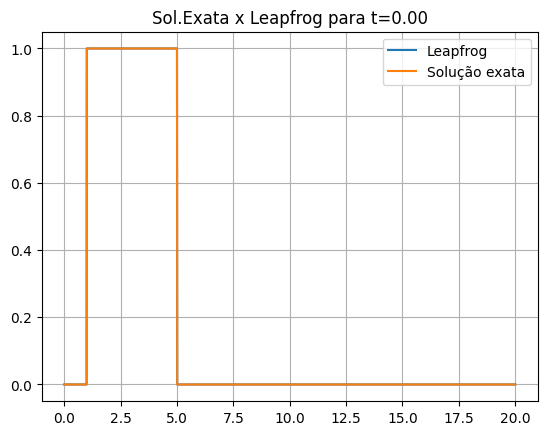

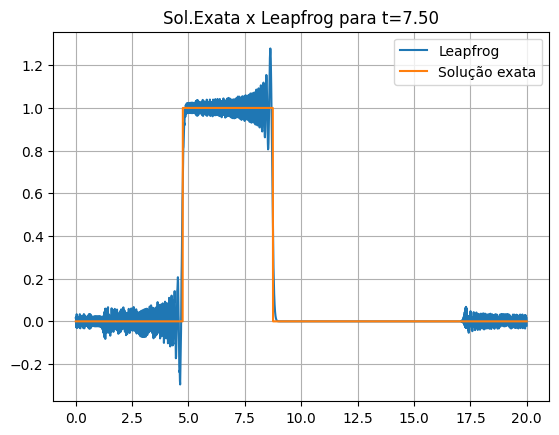

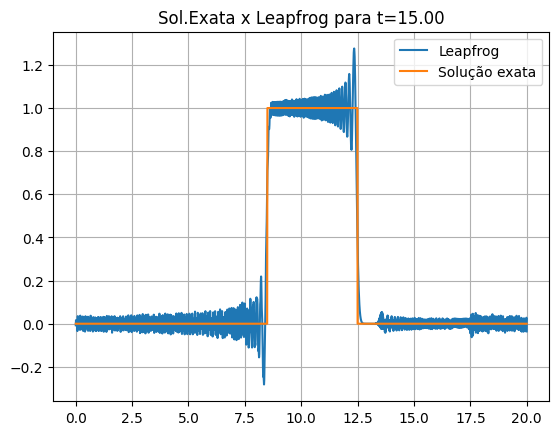

In [ ]:
#metodo Leapfrog
u_leap = np.zeros(tam)
leap_tempo = []
leap_tempo.append(u)
r_leap = a*h_t/h_x

#ambos os primeiro passos sao iguais a cond inicial
u_n = np.copy(u_tempo[0])
u_old = np.copy(u_n)

for n in range(steps) : #loop do tempo
  for i in range(tam) : #loop sobre os pontos do espaço
    #condicoes de contorno
    #u_n
    if(i==len(x)-1) :
      unip = u_n[0]
    else:
      unip = u_n[i+1]

    if(i==0) :
      unim = u_n[tam-1]
    else:
      unim = u_n[i-1]

    #u[n+1,i] = u[n-1,j] - r*(u[n,i+1] - u[n,i-1])
    u_leap[i] = u_old[i] - r_leap*(unip - unim)

  leap_tempo.append(np.copy(u_leap))
  u_old = np.copy(u_n)
  u_n = np.copy(u_leap)

#Plotando a solução a cada p passos
p=1000

for k in range(0,steps, p) :
  plt.title('Sol.Exata x Leapfrog para t='+"{:.2f}".format(k*h_t))
  plt.plot(x,leap_tempo[k], '-', label='Leapfrog')
  plt.plot(x,exact_tempo[k], '-', label='Solução exata')
  plt.grid()
  plt.legend()
  plt.show()

Através do método Lax-Friedrichs, utilizamos a seguinte aproximação:

\begin{equation*}
  u^n_i = \frac{u^n_{i+1} + u^n_{i-1}}{2}
\end{equation*}

Assim obtemos a seguinte equação:

\begin{equation*}
  u^{n+1}_i = \frac{u^n_{i+1} -2u^n_i + u^n_{i-1}}{2} - \frac{ah_t}{2h_x}(u^n_{i+1} + u^n_{i-1}) + u^n_i
\end{equation*}

In [ ]:
#metodo Lax-Friedrichs
u_lax = np.copy(u_tempo[0])
lax_tempo = []
lax_tempo.append(np.copy(u))
r_lax = (a*h_t)/(2*h_x)

for n in range(steps) : #loop do tempo
  u_n = np.copy(u_lax)
  for i in range(tam) : #loop sobre os pontos do espaço
    #condicoes de contorno
    if(i==len(x)-1) :
      unip = u_n[0]
    else:
      unip = u_n[i+1]

    if(i==0) :
      unim = u_n[tam-1]
    else:
      unim = u_n[i-1]

    #u[n+1,i] = (u[n,i+1] + u[n,i-1])/2 - (a*h_t/(2*h_x))*(u[n,i+1] - u[n,i-1])
    u_lax[i] = (unip + unim)/2.0 -r_lax*(unip - unim)

  lax_tempo.append(np.copy(u_lax))

Para o método Upwind, temos as diferenças progressivas e regressivas aproximadas pelas seguintes expressões:

\begin{equation*}
  \text { Regressiva: } \\
  \frac{\partial u}{\partial x} \approx \frac{1}{h}(u_i - u_{i-1}) \\
  \text { Progressiva: } \\
  \frac{\partial u}{\partial x} \approx \frac{1}{h}(u_{i+1} - u_i) \\
\end{equation*}

Discretizando as, obtemos:

\begin{equation*}
  u^{n+1}_i = u^n_i - \frac{ah_t}{h_x}(u^n_i - u^n_{i-1}) \\
  u^{n+1}_i = u^n_i - \frac{ah_t}{h_x}(u^n_{i+1} - u^n_i) \\
\end{equation*}

Já que $a>0$ utilizaremos o Upwind invés do Downwind, ou seja, utilizaremos a difernça no problema em questão

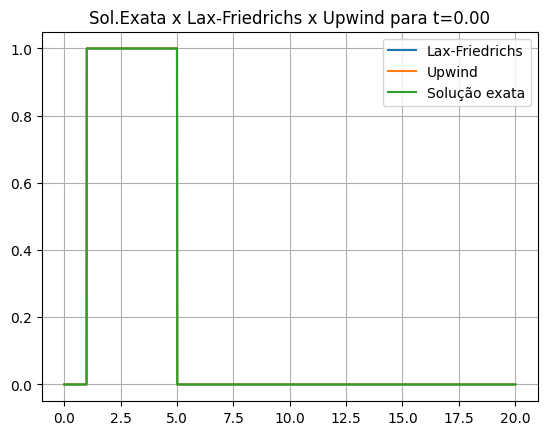

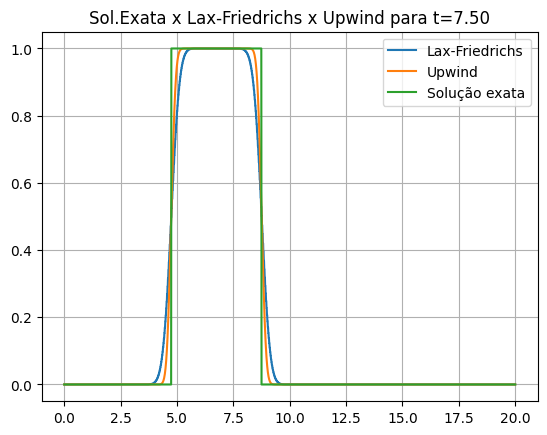

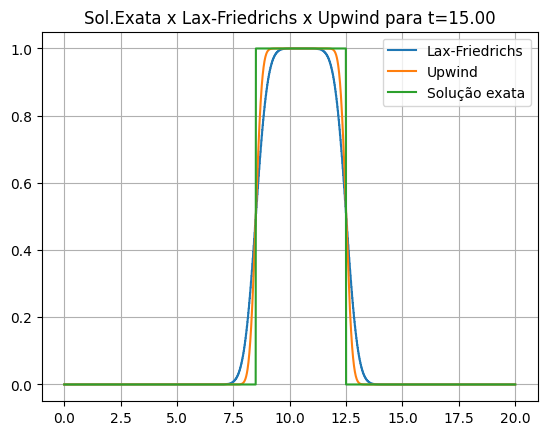

In [ ]:
#metodo Upwind
u_up = np.copy(u_tempo[0])
up_tempo = []
up_tempo.append(np.copy(u))
r_up = (a*h_t)/(h_x)

for n in range(steps) : #loop do tempo
  u_n = np.copy(u_up)
  for i in range(tam) : #loop sobre os pontos do espaço
    #condicoes de contorno
    #u_n
    if(i==0) :
      unim = u_n[tam-1]
    else:
      unim = u_n[i-1]

    #u[n+1,i] = u[n,i] - ((a*h_t)/h_x)*(u[n,i] - u[n,i-1])
    u_up[i] = u_n[i] - r_up*(u_n[i] -unim)

  up_tempo.append(np.copy(u_up))

#Plotando a solução a cada p passos
# p=1000 #ja esta definido na parte de cima caso deseje sobrescrever

for k in range(0,steps, p) :
  plt.title('Sol.Exata x Lax-Friedrichs x Upwind para t='+"{:.2f}".format(k*h_t))
  plt.plot(x,lax_tempo[k], '-', label='Lax-Friedrichs')
  plt.plot(x,up_tempo[k], '-', label='Upwind')
  plt.plot(x,exact_tempo[k], '-', label='Solução exata')
  plt.grid()
  plt.legend()
  plt.show()

No método de Lax-Wendroff, devemos expandir a
variável u em Série de Taylor e truncar os termos até a segunda ordem, da seguinte forma:

\begin{equation*}
  u^{n+1} = u^n_i + ah_t(\frac{\partial{u}}{\partial{t}}) + \frac{a^2h_t^2}{2}(\frac{\partial^2{u}}{\partial{t^2}})
\end{equation*}

Relacionando as derivadas do tempo e do espaço obtemos:

\begin{equation*}
  \frac{\partial{u}}{\partial{x}} = -a\frac{\partial{u}}{\partial{x}} \\
   \frac{\partial^2{u}}{\partial{x^2}} = a^2\frac{\partial^2{u}}{\partial{x^2}} \\
\end{equation*}

Considerando as relações do MDF centradas de 1 e 2 ordem, obtemos:

\begin{equation*}
  \frac{\partial{u}}{\partial{x}} = \frac{u^n_{i+1} - u^n_{i-1}}{2h_x} \\
  \frac{\partial^2{u}}{\partial{x^2}} = \frac{u^n_{i+1} - 2u^n_i + u^n_{i-1}}{h^2_x} \\
\end{equation*}

Aplicando as relações de diferenças centradas no espaço polinômio, obtemos:

\begin{equation*}
  u^{n+1} = u^n_i - \frac{ah_t}{2h_x}(u^n_{i+1} - u^n_{i-1}) + \frac{a^2h_t^2}{2h_x^2}(u^n_{i+1} - 2u^n_i + u^n_{i-1})
\end{equation*}

In [ ]:
#metodo Lax-Wendroff
u_wendroff = np.copy(u_tempo[0])
wendroff_tempo = []
wendroff_tempo.append(np.copy(u))
r_wendroff = (a*h_t)/(2*h_x)
r2_wendroff = ((a**2)*(h_t**2))/(2*(h_x**2))

for n in range(steps) : #loop do tempo
  u_n = np.copy(u_wendroff)
  for i in range(tam) : #loop sobre os pontos do espaço
    #condicoes de contorno
    #u_n
    if(i==len(x)-1) :
      unip = u_n[0]
    else:
      unip = u_n[i+1]

    if(i==0) :
      unim = u_n[tam-1]
    else:
      unim = u_n[i-1]

    #u[n+1,i] = u[n,i] - ((a*h_t)/2*h_x)*(u[n,i+1] - u[n,i-1]) + ((a^2*h_t^2)/2*h_x^2)*(u[n,i+1] -2u[n,i] + u[n,i-1])
    u_wendroff[i] = u_n[i] -r_wendroff*(unip - unim) + r2_wendroff*(unip - 2*u_n[i] + unim)

  wendroff_tempo.append(np.copy(u_wendroff))

O método Beam-Warming é a aplicação uma aproximação de segunda ordem utilizando a mesma estratégia de Lax-Wendroff, porém com a característica assimétrica do upwind:

\begin{equation*}
  u^{n+1}_i = u^n_i + ah_t(\frac{\partial{u}}{\partial{t}}) + \frac{a^2h_t^2}{2}(\frac{\partial^2{u}}{\partial{t^2}})
\end{equation*}

Dado que $a>0$, tomamos as seguintes aproximações para as primeiras e segundas derivadas:

\begin{equation*}
  \frac{\partial{u}}{\partial{x}} \approx \frac{3u^n_i -4u^n_{i-1} + u_{i-2}}{2h_x} \\
  \frac{\partial^2{u}}{\partial{x^2}} \approx \frac{u^n_i -2u^n_{i-1} + u_{i-2}}{h^2_x} \\
\end{equation*}

Substituindo no polinômio de Taylor, obtemos a seguinte expressão:

\begin{equation*}
  u^n_{i+1} = u^n_i - \frac{ah_t}{2h_x}(3u^n_i -4u^n_{i-1} + u_{i-2}) + \frac{a^2h^2_t}{2h^2_x}(u^n_i -2u^n_{i-1} + u_{i-2})
\end{equation*}

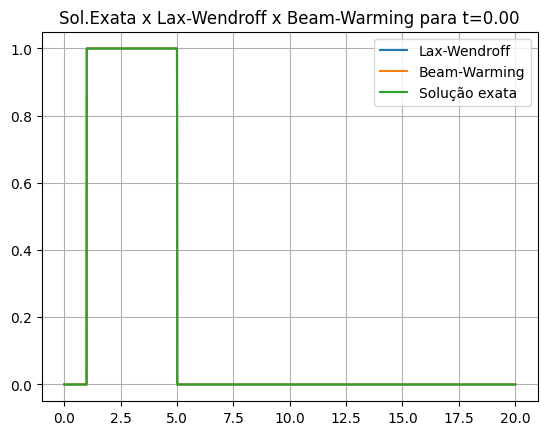

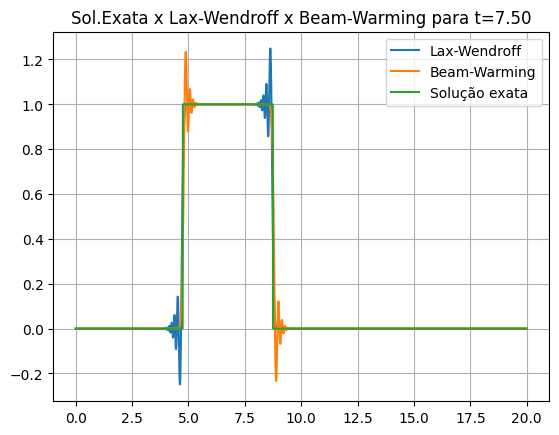

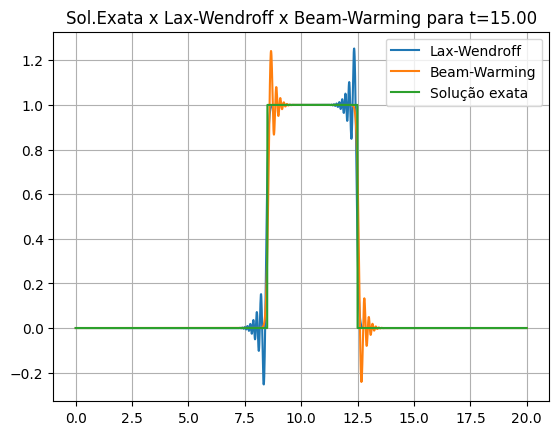

In [ ]:
#metodo Beam-Warming
u_beam = np.copy(u_tempo[0])
beam_tempo = []
beam_tempo.append(np.copy(u))
r_beam = (a*h_t)/(2*h_x)
r2_beam = ((a**2)*(h_t**2))/(2*(h_x**2))

for n in range(steps) : #loop do tempo
  u_n = np.copy(u_beam)
  for i in range(tam) : #loop sobre os pontos do espaço
    #condicoes de contorno
    #u_n
    if(i==0) :
      unim = u_n[tam-1]
    else:
      unim = u_n[i-1]

    if(i<=1) :
      unimm = u_n[tam-1]
    else:
      unimm = u_n[i-2]

    #u[n+1,i] = u[n,i] - ((a*h_t)/2*h_x)*(3*u[n,i] - 4*u[n,i-1] + u[n,i-2]) + ((a^2*h_t^2)/2*h_x^2)*(u[n,i] -2*u[n,i-1] + u[n,i-2])
    u_beam[i] =  -r_beam*(3*u_n[i] -4*unim + unimm) + r2_beam*(u_n[i] - 2*unim + unimm) + u_n[i]

  beam_tempo.append(np.copy(u_beam))

#Plotando a solução a cada p passos
# p=1000 #ja esta definido na parte de cima caso deseje sobrescrever

for k in range(0,steps, p) :
  plt.title('Sol.Exata x Lax-Wendroff x Beam-Warming para t='+"{:.2f}".format(k*h_t))
  plt.plot(x,wendroff_tempo[k], '-', label='Lax-Wendroff')
  plt.plot(x,beam_tempo[k], '-', label='Beam-Warming')
  plt.plot(x,exact_tempo[k], '-', label='Solução exata')
  plt.grid()
  plt.legend()
  plt.show()

##Questão 2

Considere o seguinte problema de advecção-difusão
    \begin{equation*}
    \begin{cases}
        \displaystyle \frac{\partial u}{\partial t} + a\frac{\partial u}{\partial x} = 0.1\frac{\partial^2 u}{\partial x^2} \text{ em }\Omega \times I \\
        0.1 \nabla u \cdot \vec{n} = 0 \text{ em }\partial \Omega \times I \\
        u(x,0) = \begin{cases}
            1 & \text{ para } x\in[0.4,0.6]\\
            0 & \text{ c.c.}
        \end{cases}
    \end{cases}
    \end{equation*}

Tomando $\Omega = [0,1]$, $I=(0,1]$, $h_x=0.01$ e $h_t=0.0001$

a) Resolva este problema tomando a=0.2

b) Resolva este problema tomando a=-0.3

Consideremos as sguintes aproximações, tomamos uma diferença centrada de segunda ordem em relação ao espaço:

\begin{equation*}
  \frac{\partial^2{u}}{\partial{x^2}} \approx \frac{u_{i+1} -2u_i + u_{i-1}}{h^2_x}
\end{equation*}

Para discretizar a derivada em relação ao tempo, tomamos uma diferença progressiva, assim:

\begin{equation*}
  \frac{\partial{u}}{\partial{t}} \approx \frac{u^{n+1} - u^n}{h_t}
\end{equation*}

Dado que o $a>0$ utilizamos o método upwind:

\begin{equation*}
  \frac{\partial{u}}{\partial{x}} \approx \frac{1}{h}(u_i - u_{i-1})
\end{equation*}

Aglutinando as expressões, podemos reescrever essa discretiação da seguinte forma, dado que $a>0$:

\begin{equation*}
  u^{n+1}_i = u^n_i - r_{adv}(u^n_i - u^n_{i-1}) + r_{dif}(u^n_{i+1} -2u^n_i + u^n_{i-1})
\end{equation*}

onde $r_{adv} = \frac{ah_t}{h_t}$ e $\frac{kh_x}{h^2_x}$

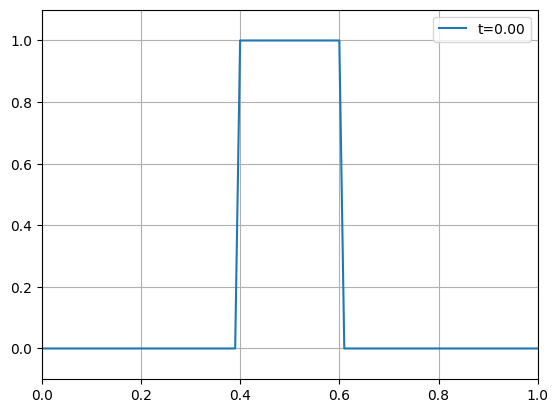

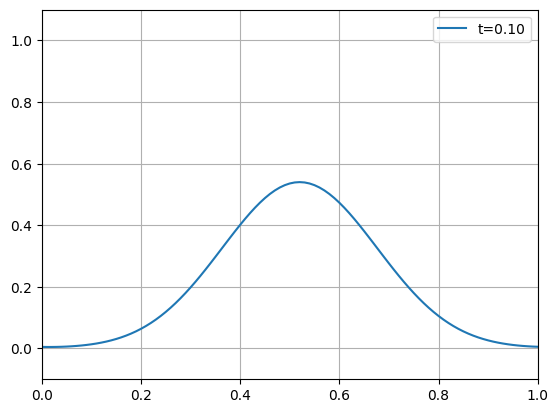

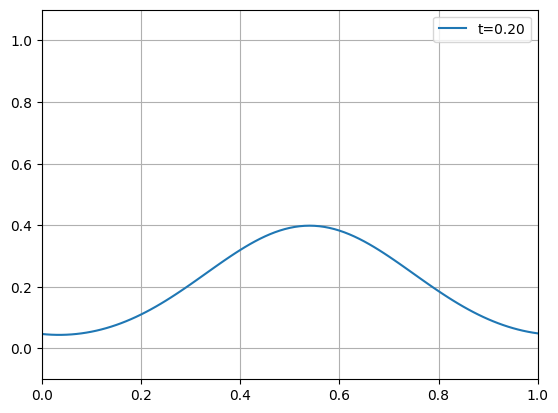

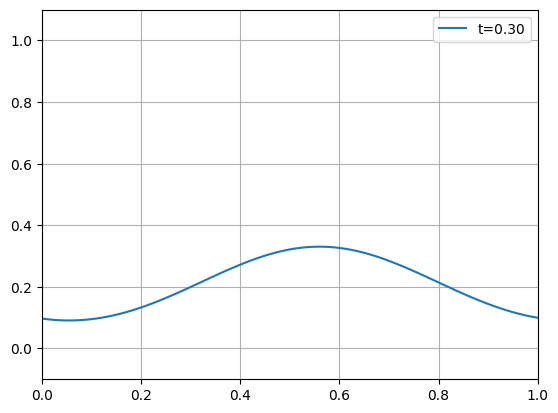

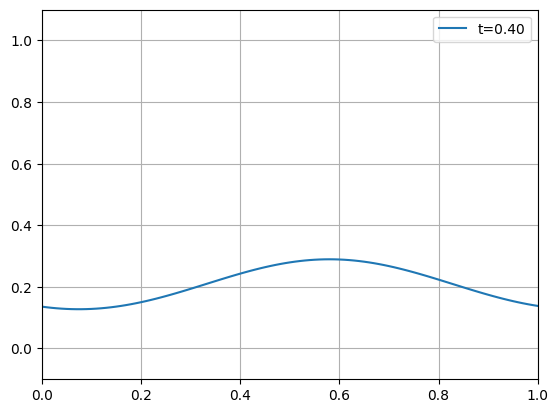

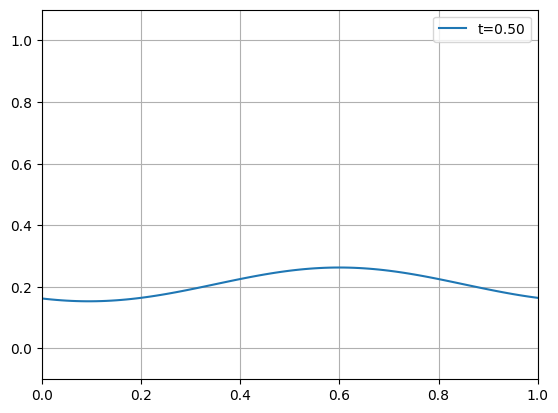

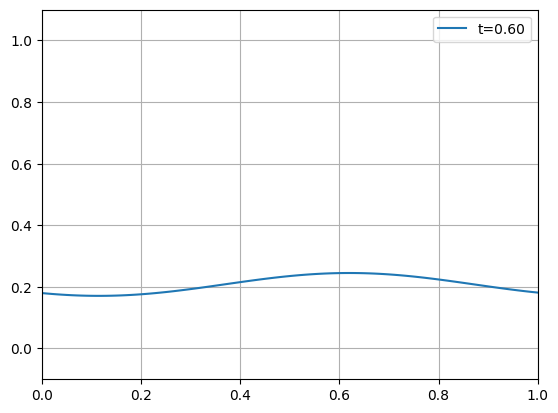

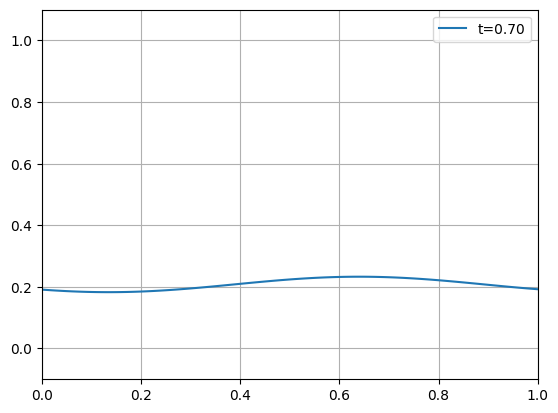

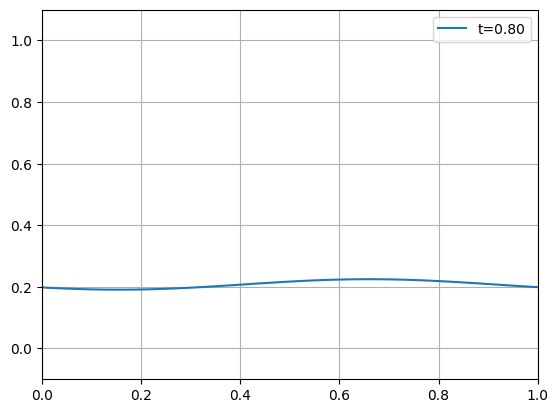

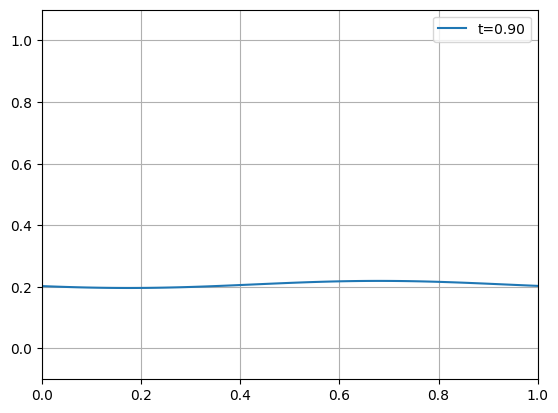

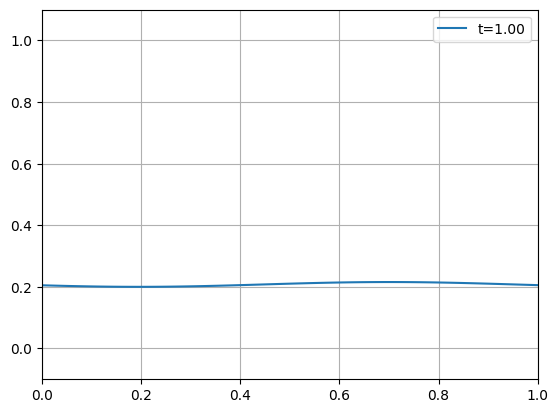

In [ ]:
a = 0.2
kappa = 0.1

h_x = 0.01
h_t = 0.0001

x = np.arange(0, 1+h_x/2, h_x)
t = np.arange(0, 1+h_t/2, h_t)

tam = len(x) #dimensão do sistema
steps = len(t) #numero de passos de tempo

#condicao inicial e de contorno periodica
def f(x):
  if(x>=0.4 and x<=0.6) :
    return 1
  else :
    return 0

r_adv = (a*h_t)/h_x
r_dif = (kappa*h_t)/(h_x**2)

#inicial
u = np.zeros(tam)
u_tempo = []
u_tempo.append(u)

for n in range(steps) : #loop do tempo
  for i in range(tam) : #loop sobre os pontos do espaço
    u[i] = f(x[i])
  u_tempo.append(np.copy(u))

#metodo Upwind
u_ad = np.copy(u_tempo[0])
ad_tempo = []
ad_tempo.append(np.copy(u))

for n in range(steps) : #loop do tempo
  u_n = np.copy(u_ad)
  for i in range(tam) : #loop sobre os pontos do espaço
    #condicoes de contorno
    #u_n
    if(i==0) :
      unim = u_n[tam-1]
    else:
      unim = u_n[i-1]

    if(i==tam-1) :
      unip = u_n[0]
    else:
      unip = u_n[i+1]

    #u[n+1,i] = u[n,i] - ((a*h_t)/h_x)*(u[n,i] - u[n,i-1])
    u_ad[i] = u_n[i] - r_adv*(u_n[i] - unim) + r_dif*(unip - 2*u_n[i] + unim)

  ad_tempo.append(np.copy(u_ad))

#Plotando a solução a cada p passos
p=1000 #ja esta definido na parte de cima caso deseje sobrescrever

for k in range(0,steps, p) :
  plt.plot(x,ad_tempo[k], '-', label='t='+"{:.2f}".format(k*h_t))
  plt.xlim(0, 1)
  plt.ylim(-0.1, 1.1)
  plt.grid()
  plt.legend()
  plt.show()

Dado que o $a>0$ utilizamos o método upwind:

\begin{equation*}
  \frac{\partial{u}}{\partial{x}} \approx \frac{1}{h}(u^n_{i+1} - u^n_i)
\end{equation*}

Analogamente temos que:

\begin{equation*}
  u^{n+1}_i = u^n_i - r_{adv}(u^n_{i+1} - u^n_i) + r_{dif}(u^n_{i+1} -2u^n_i + u^n_{i-1})
\end{equation*}

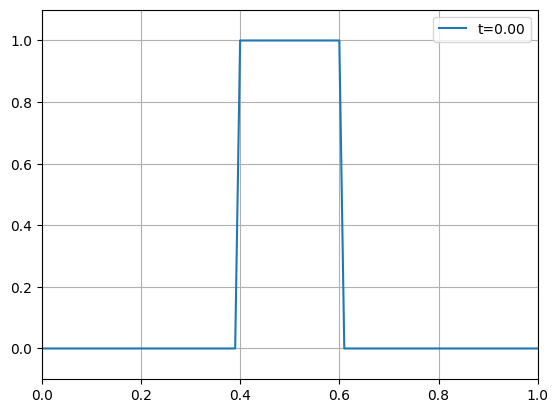

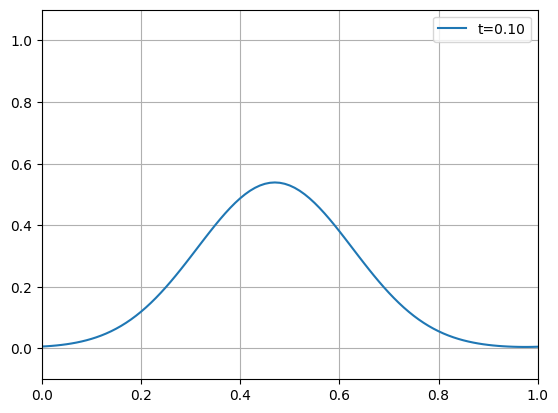

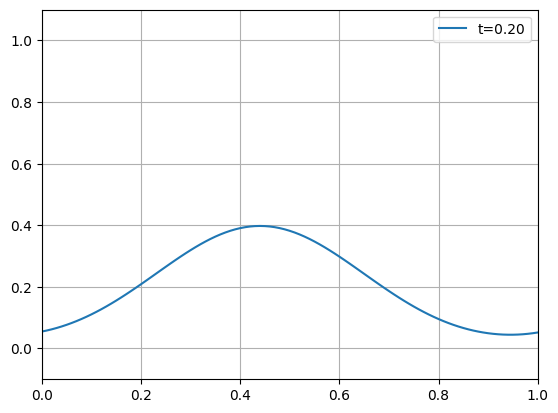

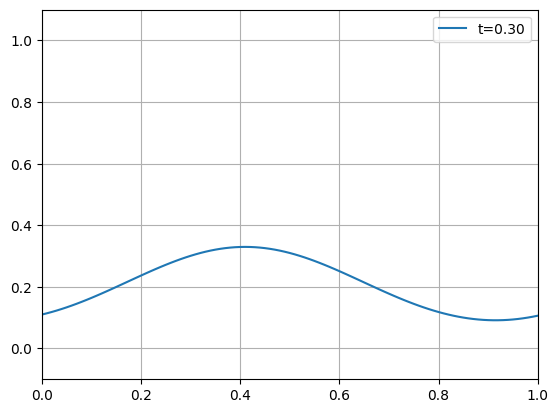

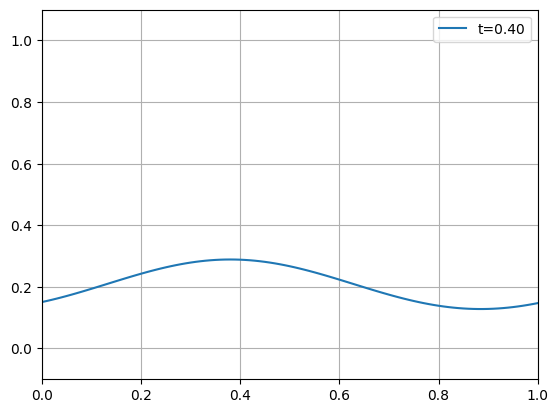

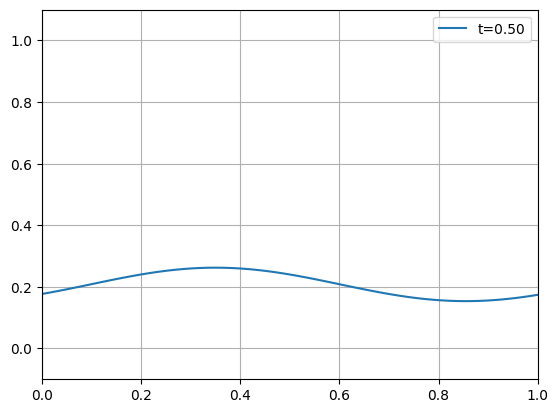

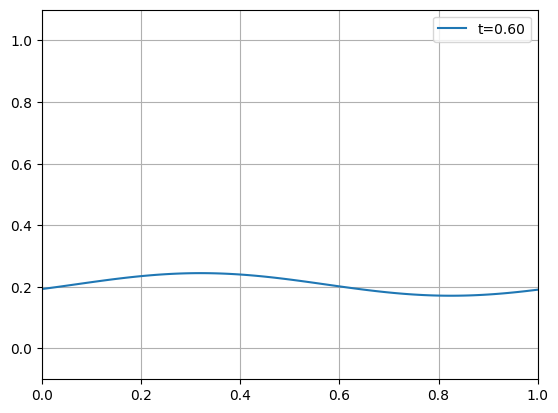

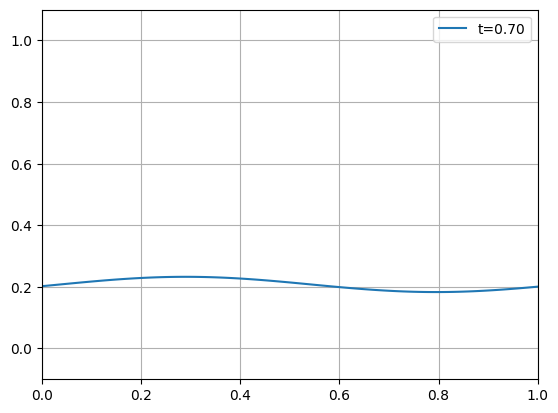

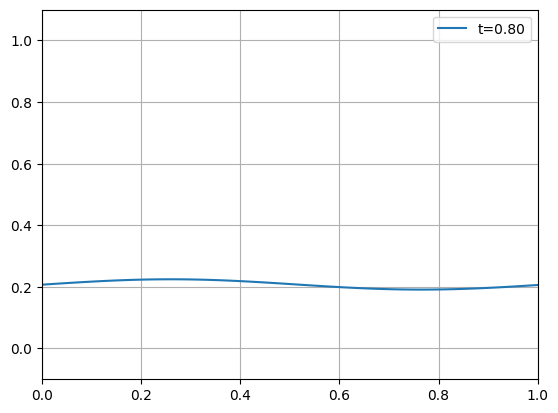

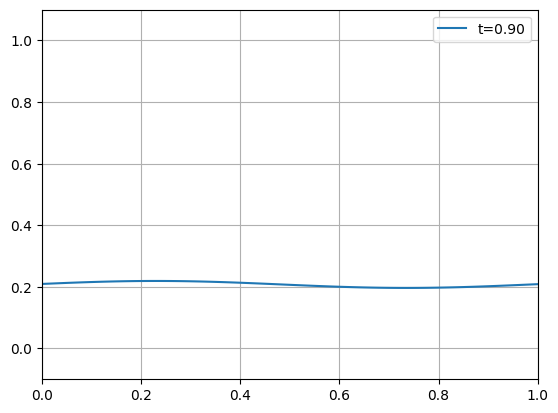

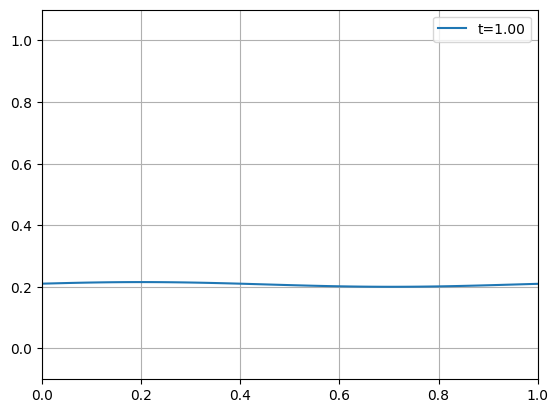

In [ ]:
a = -0.3
kappa = 0.1

h_x = 0.01
h_t = 0.0001

x = np.arange(0, 1+h_x/2, h_x)
t = np.arange(0, 1+h_t/2, h_t)

tam = len(x) #dimensão do sistema
steps = len(t) #numero de passos de tempo

#condicao inicial e de contorno periodica
def f(x):
  if(x>=0.4 and x<=0.6) :
    return 1
  else :
    return 0

r_adv = (a*h_t)/h_x
r_dif = (kappa*h_t)/(h_x**2)

#inicial
u = np.zeros(tam)
u_tempo = []
u_tempo.append(u)

for n in range(steps) : #loop do tempo
  for i in range(tam) : #loop sobre os pontos do espaço
    u[i] = f(x[i])
  u_tempo.append(np.copy(u))

#metodo Upwind
u_ad = np.copy(u_tempo[0])
ad_tempo = []
ad_tempo.append(np.copy(u))

for n in range(steps) : #loop do tempo
  u_n = np.copy(u_ad)
  for i in range(tam) : #loop sobre os pontos do espaço
    #condicoes de contorno
    #u_n
    if(i==0) :
      unim = u_n[tam-1]
    else:
      unim = u_n[i-1]

    if(i==tam-1) :
      unip = u_n[0]
    else:
      unip = u_n[i+1]

    #u[n+1,i] = u[n,i] - ((a*h_t)/h_x)*(u[n,i] - u[n,i-1])
    u_ad[i] = u_n[i] - r_adv*(unip - u_n[i]) + r_dif*(unip - 2*u_n[i] + unim)

  ad_tempo.append(np.copy(u_ad))

#Plotando a solução a cada p passos
p=1000 #ja esta definido na parte de cima caso deseje sobrescrever

for k in range(0,steps, p) :
  plt.plot(x,ad_tempo[k], '-', label='t='+"{:.2f}".format(k*h_t))
  plt.xlim(0, 1)
  plt.ylim(-0.1, 1.1)
  plt.grid()
  plt.legend()
  plt.show()